### Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import trim_mean
import wquantiles
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

#### Load data

In [6]:
AIRLINE_STATS_CSV   = 'data/airline_stats.csv'
KC_TAX_CSV          = 'data/kc_tax.csv.gz'
LC_LOANS_CSV        = 'data/lc_loans.csv'
AIRPORT_DELAYS_CSV  = 'data/dfw_airline.csv'
SP500_DATA_CSV      = 'data/sp500_data.csv.gz'
SP500_SECTORS_CSV   = 'data/sp500_sectors.csv'
STATE_CSV           = 'data/state.csv'

##### Estimates of Location

Example: Location estimates of Population and Murder Rates

In [3]:
state = pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


`Mean`, `Median` and `Trimmed Mean`

In [13]:
# Mean Calculation using pandas function
mean = state['Population'].mean()
print(f'Mean of Population = {mean}')

# Median Calculation using pandas function
median = state['Population'].median()
print(f'Median of Population = {median}')

# Trimmed Mean Calculation using scipy.stats
trimmed_mean = trim_mean(state['Population'], 0.1)
print(f'Trimmed Mean of Population = {trimmed_mean}')

Mean of Population = 6162876.3
Median of Population = 4436369.5
Trimmed Mean of Population = 4783697.125


<p>Proof that how outlier is reduced from mean to median</p> <br>
Mean > Trimmed Mean > Median


`Weighted mean` and `Weighted Median`

In [16]:
# Weighted mean calculation using Numpy
weighted_mean = np.average(
    state['Murder.Rate'],
    weights = state['Population']
)
print(f'Weighted Mean of Murder rate where weights are Population = {weighted_mean}')

# Weighted Median calculation using wquantiles library
weighted_median = wquantiles.median(
    state['Murder.Rate'],
    weights = state['Population']
)
print(f'Weighted Median of Murder rate where weights are Population = {weighted_median}')


Weighted Mean of Murder rate where weights are Population = 4.445833981123393
Weighted Median of Murder rate where weights are Population = 4.4


### Estimates of Variability

In [6]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


`Standard Deviation`, `Interquartile range` and `Median absolute Deviation`

In [25]:
print(f"Standard Deviation of Population: {state['Population'].std()}")
print(f"Interquartile range { state['Population'].quantile(0.75) -  state['Population'].quantile(0.25) }")
# Method 1:
print(f"Mean Absolute Deviation {robust.scale.mad(state['Population'])}")
# Method 2:

'''
The value 0.6744897501960817 is the constant scaling factor for the median absolute deviation (MAD) to estimate the 
standard deviation of a normal distribution. This value is approximately equal to the inverse of the cumulative 
distribution function (CDF) at 0.75 for a standard normal distribution, which is commonly used in statistics.

In simpler terms, this constant is used to scale the median absolute deviation so that it can be interpreted in a way 
similar to the standard deviation of a normal distribution. It helps in comparing the variability of different datasets, 
especially when dealing with distributions that are not necessarily normally distributed.
'''

pd_mad = abs(
    state['Population'] - state['Population'].median()
).median() / 0.6744897501960817

print(f"Mean Absolute Deviation by Pandas: {pd_mad}")

Standard Deviation of Population: 6848235.347401142
Interquartile range 4847308.0
Mean Absolute Deviation 3849876.1459979336
Mean Absolute Deviation by Pandas: 3849876.1459979336


### Estimation of Distribution

In [5]:
# Quantiles
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


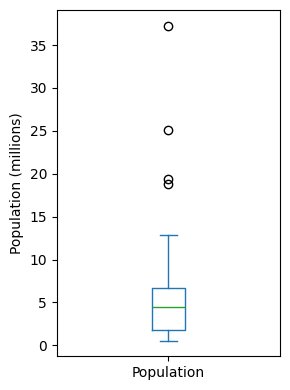

In [9]:
# Boxplot
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

#### Frequency Table and Histograms

In [14]:
# The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. 
# The following code creates equal sized bins. The method value_counts returns a frequency table.

binnedPopulation = pd.cut(state['Population'], 10)
display(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

In [13]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
display(pd.DataFrame(groups))

C:\Users\gg\AppData\Local\Temp\ipykernel_24068\736988800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in df.groupby(by='binnedPopulation'):


,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


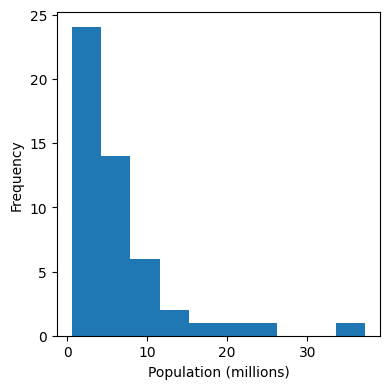

In [15]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

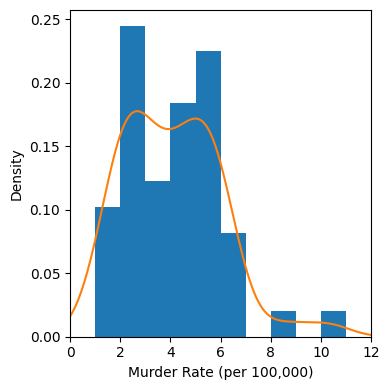

In [16]:
# Density Estimates
# Density is an alternative to histograms that can provide more insight into the distribution of the data points. 
# Use the argument bw_method to control the smoothness of the density curve.

ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

### Exploring Binary and Categorical Data

In [11]:
dfw = pd.read_csv('data/dfw_airline.csv')
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


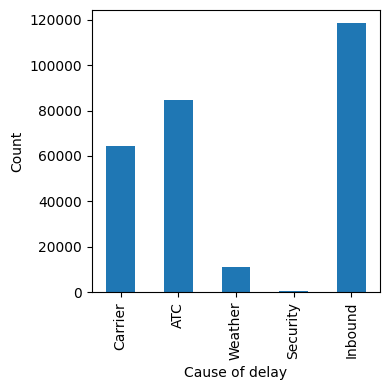

In [12]:
# Pandas also supports bar charts for displaying a single categorical variable.
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()